In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data = pd.read_csv('train.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
salary_mean = data['salary'].mean()
data['salary'] = data['salary'].fillna(salary_mean)

In [6]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
obj = []
for col in data.columns:
    if data[col].dtype == "object":
        obj.append(col)
        print(col,data[col].unique(),len(data[col].unique()))

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ssc_b'] = label_encoder.fit_transform(data['ssc_b'])
data['hsc_b'] = label_encoder.fit_transform(data['hsc_b'])
data['hsc_s'] = label_encoder.fit_transform(data['hsc_s'])
data['degree_t'] = label_encoder.fit_transform(data['degree_t'])
data['workex'] = label_encoder.fit_transform(data['workex'])
data['specialisation'] = label_encoder.fit_transform(data['specialisation'])
data['status'] = label_encoder.fit_transform(data['status'])

In [9]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [10]:
data[data['gender']==1]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
6,7,1,46.00,1,49.2,1,1,79.0,0,0,74.28,0,53.29,0,288655.405405
12,13,1,47.00,0,55.0,1,2,65.0,0,0,62.00,1,65.04,0,288655.405405
13,14,1,77.00,0,87.0,0,1,59.0,0,0,68.00,0,68.63,1,218000.000000
15,16,1,65.00,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1,200000.000000
17,18,1,55.00,0,67.0,0,1,64.0,0,0,60.00,0,67.28,0,288655.405405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,1,83.96,1,53.0,1,2,91.0,2,0,59.32,1,69.71,1,260000.000000
198,199,1,67.00,0,70.0,0,1,65.0,1,0,88.00,1,71.96,0,288655.405405
204,205,1,74.00,1,73.0,1,1,73.0,0,1,80.00,0,67.69,1,210000.000000
208,209,1,43.00,0,60.0,1,2,65.0,0,0,92.66,1,62.92,0,288655.405405


In [12]:
# Drop irrelevant columns
data.drop(['sl_no', 'salary'], axis=1, inplace=True)

# Split the data into features and target variable
X = data.drop('status', axis=1)
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyError: "['sl_no', 'salary'] not found in axis"

In [13]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [14]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


5/5 [==============================] - 1s 51ms/step - loss: 0.6860 - accuracy: 0.5547 - val_loss: 0.6228 - val_accuracy: 0.7429
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6189 - accuracy: 0.6861 - val_loss: 0.5674 - val_accuracy: 0.8286
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5646 - accuracy: 0.7810 - val_loss: 0.5201 - val_accuracy: 0.8571
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5171 - accuracy: 0.8248 - val_loss: 0.4813 - val_accuracy: 0.8857
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.4787 - accuracy: 0.8686 - val_loss: 0.4494 - val_accuracy: 0.8571
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.4430 - accuracy: 0.8686 - val_loss: 0.4212 - val_accuracy: 0.8571
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.4136 - accuracy: 0.8686 - val_loss: 0.3963 - val_accuracy: 0.8571
Epoch 8/50
5/5 [==========

In [16]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.4527 - accuracy: 0.8372
Test Loss: 0.452710896730423
Test Accuracy: 0.8372092843055725


In [17]:
# Define the input values
input_values = [0, 10.00, 1, 20.00, 1, 1, 30.00, 2, 0, 40.0, 1, 50.80]

# Reshape and scale the input features
input_values_array = np.array(input_values).reshape(1, -1)
input_values_scaled = scaler.transform(input_values_array)

# Make prediction on the scaled input
prediction = model.predict(input_values_scaled)

print("Predicted Value : ", prediction)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    print("The student is predicted to be placed.")
else:
    print("The student is predicted not to be placed.")


1/1 [==============================] - 0s 85ms/step
Predicted Value :  [[2.985409e-11]]
The student is predicted not to be placed.


c:\Users\subod\anaconda3\envs\oi\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# Save the model
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a pandas DataFrame
# For demonstration purposes, let's assume you have a DataFrame called 'df' with your original dataset
df = pd.read_csv('train.csv')
df.drop_duplicates(inplace=True)
df['salary'] = df['salary'].fillna(0)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ssc_b'] = label_encoder.fit_transform(df['ssc_b'])
df['hsc_b'] = label_encoder.fit_transform(df['hsc_b'])
df['hsc_s'] = label_encoder.fit_transform(df['hsc_s'])
df['degree_t'] = label_encoder.fit_transform(df['degree_t'])
df['workex'] = label_encoder.fit_transform(df['workex'])
df['specialisation'] = label_encoder.fit_transform(df['specialisation'])
df['status'] = label_encoder.fit_transform(df['status'])

# Random Sampling
# Generate synthetic entries by randomly sampling from existing data

# Define the number of synthetic entries you want to generate
num_synthetic_entries = 1000

# Randomly sample rows from the original dataset to create synthetic entries
synthetic_data = df.sample(n=num_synthetic_entries, replace=True)

# Data Augmentation Techniques
# Apply data augmentation techniques to existing data to create synthetic variations

# For example, you can add random noise to numerical columns
noise_mean = 0
noise_std = 0.1

# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=np.number).columns

# Generate random noise
noise = np.random.normal(noise_mean, noise_std, size=(num_synthetic_entries, len(numerical_columns)))

# Add noise to the numerical columns to create synthetic variations
for i, col in enumerate(numerical_columns):
    synthetic_data[col] += noise[:, i]

# Apply constraints to ensure that the synthetic data falls within the desired range
# For binary columns, round the values to 0.0 or 1.0, mapping negative zero to zero
# For numerical columns, clip the values to be within the range [0, 100]

# Round binary columns to 0.0 or 1.0, mapping negative zero to zero
binary_columns = ['gender', 'workex', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'status']
synthetic_data[binary_columns] = synthetic_data[binary_columns].round().astype(int)

# Clip numerical columns to be within the range [0, 100]
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
synthetic_data[numerical_columns] = synthetic_data[numerical_columns].clip(0, 100)

# Concatenate the original dataset with the synthetic data
augmented_data = pd.concat([df, synthetic_data], ignore_index=True)

# Now 'augmented_data' contains both the original dataset and the synthetic entries, with the synthetic data meeting the specified range constraints
augmented_data


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.000000,0,67.000000,1,91.000000,1,1,58.000000,2,0,55.000000,1,58.800000,1,270000.000000
1,2.000000,0,79.330000,0,78.330000,1,2,77.480000,2,1,86.500000,0,66.280000,1,200000.000000
2,3.000000,0,65.000000,0,68.000000,0,0,64.000000,0,0,75.000000,0,57.800000,1,250000.000000
3,4.000000,0,56.000000,0,52.000000,0,2,52.000000,2,0,66.000000,1,59.430000,0,0.000000
4,5.000000,0,85.800000,0,73.600000,0,1,73.300000,0,0,96.800000,0,55.500000,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,150.961704,0,70.948244,0,58.324802,0,2,57.901019,2,1,55.817909,0,61.155629,1,100.000000
1211,149.748979,0,44.004118,0,58.284031,0,0,54.920435,0,1,64.338766,1,58.634922,0,0.000000
1212,9.837182,0,58.006530,0,70.067640,0,1,61.009220,0,0,53.915585,0,52.222850,0,0.092247
1213,155.080409,0,53.029023,0,62.935267,1,2,59.913202,0,1,70.009547,0,53.278775,1,100.000000


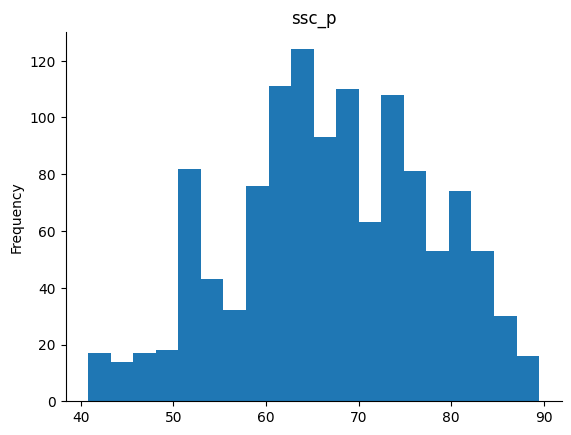

In [ ]:
# @title ssc_p

from matplotlib import pyplot as plt
augmented_data['ssc_p'].plot(kind='hist', bins=20, title='ssc_p')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
augmented_data[augmented_data['status'] == 1]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.000000,1,91.000000,1,1,58.000000,2,0,55.000000,1,58.800000,1
1,0,79.330000,0,78.330000,1,2,77.480000,2,1,86.500000,0,66.280000,1
2,0,65.000000,0,68.000000,0,0,64.000000,0,0,75.000000,0,57.800000,1
4,0,85.800000,0,73.600000,0,1,73.300000,0,0,96.800000,0,55.500000,1
7,0,82.000000,0,64.000000,0,2,66.000000,2,1,67.000000,0,62.140000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0,73.773166,0,62.005055,1,2,67.981883,0,0,74.101200,0,57.950265,1
1209,0,55.793610,1,61.377942,1,1,56.781016,0,0,66.082274,1,58.241790,1
1211,0,74.998575,1,70.191802,1,1,71.016282,0,0,94.742060,0,66.904448,1
1213,0,62.960175,1,66.970750,1,1,66.157855,0,0,67.896433,1,57.675825,1


In [ ]:
augmented_data[augmented_data['status'] == 0]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
3,0,56.000000,0,52.000000,0,2,52.000000,2,0,66.000000,1,59.430000,0
5,0,55.000000,1,49.800000,1,2,67.250000,2,1,55.000000,0,51.580000,0
6,1,46.000000,1,49.200000,1,1,79.000000,0,0,74.280000,0,53.290000,0
9,0,58.000000,0,70.000000,0,1,61.000000,0,0,54.000000,0,52.210000,0
12,1,47.000000,0,55.000000,1,2,65.000000,0,0,62.000000,1,65.040000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,54.370638,0,61.182374,0,1,56.389059,0,0,66.948840,1,62.711446,0
1196,0,62.013749,1,50.907608,1,2,52.035554,1,0,68.465105,1,62.786734,0
1206,0,51.082307,0,44.075706,0,1,57.032410,0,0,64.064960,0,51.412189,0
1210,0,53.943699,0,82.020231,1,1,62.974270,2,0,50.003829,0,59.359092,0


In [ ]:
# Drop irrelevant columns
augmented_data.drop(['sl_no', 'salary'], axis=1, inplace=True)

# Split the data into features and target variable
X = augmented_data.drop('status', axis=1)
y = augmented_data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Check unique values in the target variable y
print(data['status'].unique())


[1 0]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("train.csv")

data.drop_duplicates(inplace=True)
data['salary'] = data['salary'].fillna(0)

# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ssc_b'] = label_encoder.fit_transform(data['ssc_b'])
data['hsc_b'] = label_encoder.fit_transform(data['hsc_b'])
data['hsc_s'] = label_encoder.fit_transform(data['hsc_s'])
data['degree_t'] = label_encoder.fit_transform(data['degree_t'])
data['workex'] = label_encoder.fit_transform(data['workex'])
data['specialisation'] = label_encoder.fit_transform(data['specialisation'])
data['status'] = label_encoder.fit_transform(data['status'])

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [ ]:
# Split the data into features and target variables
X = data.drop(['sl_no', 'status'], axis=1)
y_status = data['status']
y_salary = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_status_train, y_status_test, y_salary_train, y_salary_test = train_test_split(X, y_status, y_salary, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:




# Define the neural network architecture for predicting placement status
status_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the status model
status_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print status model summary
status_model.summary()

# Train the status model
status_model.fit(X_train_scaled, y_status_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the status model on test data
status_test_loss, status_test_accuracy = status_model.evaluate(X_test_scaled, y_status_test)
print("Placement Status Test Loss:", status_test_loss)
print("Placement Status Test Accuracy:", status_test_accuracy)

# Define the neural network architecture for predicting salary
salary_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(1)
])

# Compile the salary model
salary_model.compile(optimizer='adam', loss='mean_squared_error')

# Print salary model summary
salary_model.summary()

# Train the salary model
salary_model.fit(X_train_scaled, y_salary_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the salary model on test data
salary_test_loss = salary_model.evaluate(X_test_scaled, y_salary_test)
print("Salary Test Loss:", salary_test_loss)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
5/5 [====

In [ ]:
n = 4
k = 1
for i in range(n):
  for j in range(i+1):
    print(k,end=" ")
    k+=1
  print()


1 
2 3 
4 5 6 
7 8 9 10 


In [ ]:
string = 'yes or no number'
items = string.split(' ')
max_val = ''

for item in items:
  if len(item) > len(max_val):
    max_val = item
print(max_val)

number
